In [3]:
# -----------------------
# Imports
# -----------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# -----------------------
# Chargement des données
# -----------------------
CSV_FILE = "cves_consolidees.csv"
df = pd.read_csv(CSV_FILE)

print("Nombre total de lignes :", len(df))
print("Colonnes :", list(df.columns))

# Nettoyage minimal
df["Score CVSS"] = pd.to_numeric(df["Score CVSS"], errors="coerce")
df["Score EPSS"] = pd.to_numeric(df["Score EPSS"], errors="coerce")


Nombre total de lignes : 20
Colonnes : ['Titre bulletin (ANSSI)', 'Type bulletin', 'Date publication', 'Identifiant CVE', 'Score CVSS', 'Base Severity', 'Type CWE', 'Score EPSS', 'Lien bulletin (ANSSI)', 'Description', 'Éditeur/Vendor', 'Produit', 'Versions affectées']


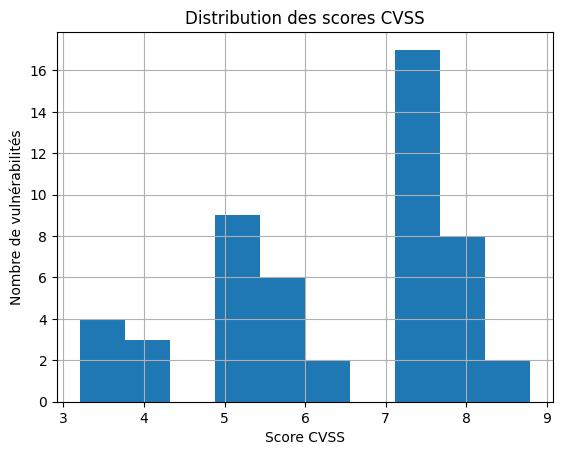

In [4]:
# -----------------------
# 1) Histogramme CVSS
# -----------------------

plt.figure()
df["Score CVSS"].dropna().hist(bins=10)
plt.title("Distribution des scores CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()

**Interprétation :** Ce graphique montre la distribution des scores CVSS (Common Vulnerability Scoring System) parmi les vulnérabilités analysées. Le CVSS mesure la sévérité technique d'une vulnérabilité sur une échelle de 0 à 10. Une concentration dans les scores élevés (7-10) indique des vulnérabilités plus critiques, tandis qu'une concentration dans les scores faibles (0-4) suggère des vulnérabilités moins sévères. Cette distribution permet d'identifier si les bulletins ANSSI concernent principalement des vulnérabilités critiques ou modérées.

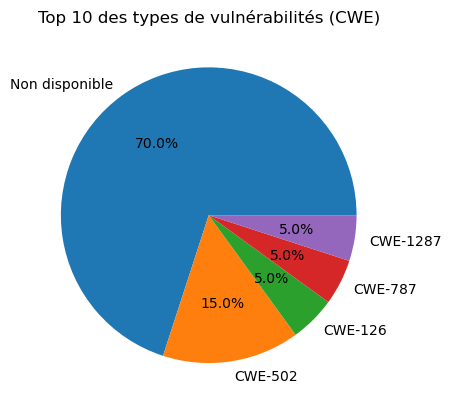

In [5]:
# -----------------------
# 2) Diagramme circulaire des CWE
# -----------------------

plt.figure()
df["Type CWE"].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.title("Top 10 des types de vulnérabilités (CWE)")
plt.ylabel("")
plt.show()

**Interprétation :** Ce diagramme circulaire présente les 10 types de vulnérabilités (CWE - Common Weakness Enumeration) les plus fréquents dans les bulletins ANSSI. Les CWE identifient les catégories de faiblesses logicielles (ex: injection SQL, buffer overflow, XSS). Cette visualisation permet de comprendre quels types de vulnérabilités sont les plus répandus dans les produits analysés, ce qui peut orienter les priorités de sécurité et les mesures de protection à mettre en place.

**Interprétation :** L'histogramme des scores EPSS (Exploit Prediction Scoring System) montre la probabilité qu'une vulnérabilité soit exploitée dans les 30 prochains jours, sur une échelle de 0 à 1. Un score EPSS élevé (>0.5) indique un risque d'exploitation élevé. Cette distribution complète l'analyse CVSS en ajoutant une dimension temporelle et probabiliste. Une concentration dans les scores élevés suggère que les vulnérabilités identifiées présentent un risque d'exploitation actif, nécessitant une attention prioritaire.

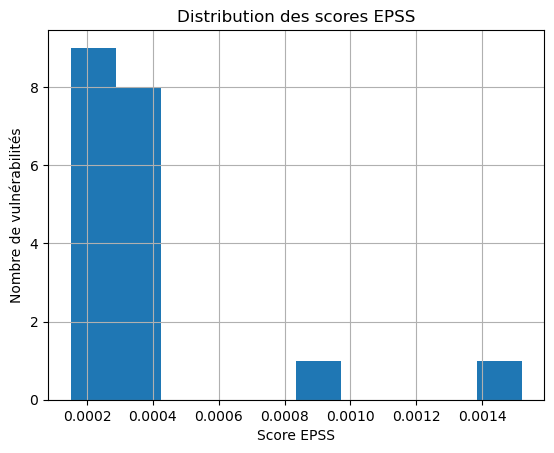

In [6]:
# -----------------------
# 3) Distribution EPSS
# -----------------------

plt.figure()
df["Score EPSS"].dropna().hist(bins=10)
plt.title("Distribution des scores EPSS")
plt.xlabel("Score EPSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()

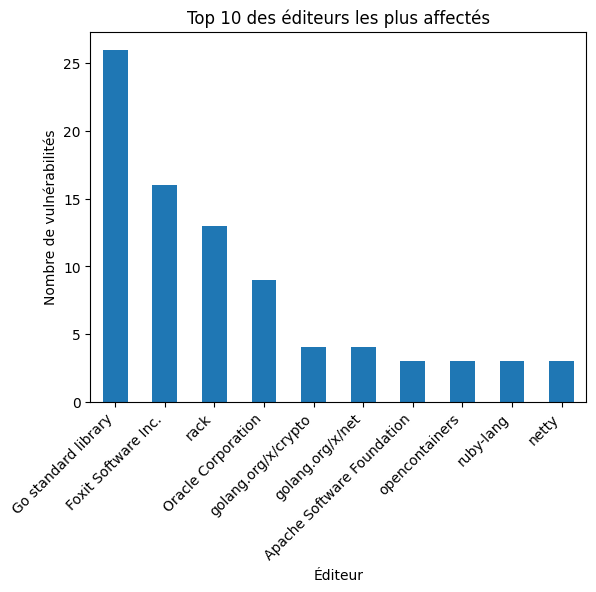

In [7]:
# -----------------------
# 4) Top éditeurs les plus affectés
# -----------------------

top_vendors = df["Éditeur/Vendor"].value_counts().head(10)

plt.figure()
top_vendors.plot.bar()
plt.title("Top 10 des éditeurs les plus affectés")
plt.xlabel("Éditeur")
plt.ylabel("Nombre de vulnérabilités")
plt.xticks(rotation=45, ha="right")
plt.show()

**Interprétation :** Ce graphique en barres identifie les 10 éditeurs/vendeurs de logiciels les plus fréquemment mentionnés dans les bulletins ANSSI. Cela permet d'identifier quels fournisseurs sont les plus touchés par les vulnérabilités signalées. Cette information est cruciale pour les organisations qui utilisent ces produits, car elle indique où concentrer les efforts de veille et de mise à jour de sécurité. Les éditeurs en tête de liste nécessitent une attention particulière.

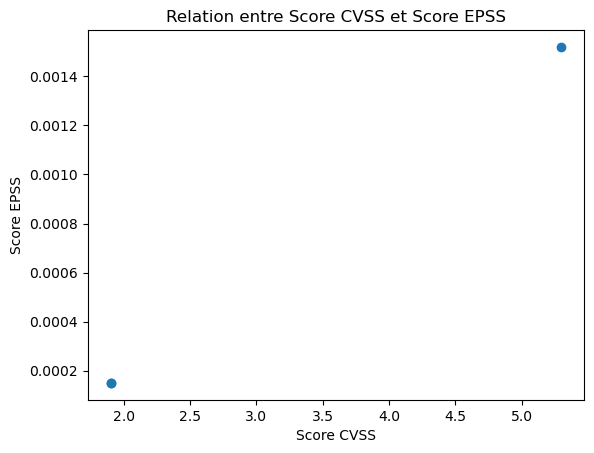

In [7]:
# -----------------------
# 5) Nuage de points CVSS vs EPSS
# -----------------------

plt.figure()
plt.scatter(df["Score CVSS"], df["Score EPSS"])
plt.title("Relation entre Score CVSS et Score EPSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.show()

**Interprétation :** Ce nuage de points explore la relation entre les scores CVSS (sévérité technique) et EPSS (probabilité d'exploitation). Une corrélation positive suggère que les vulnérabilités les plus sévères sont aussi les plus susceptibles d'être exploitées. Cependant, une faible corrélation indique que certaines vulnérabilités peuvent être sévères mais peu exploitées, ou inversement. Les points dans le quadrant supérieur droit (CVSS élevé + EPSS élevé) représentent les vulnérabilités les plus critiques nécessitant une action immédiate.

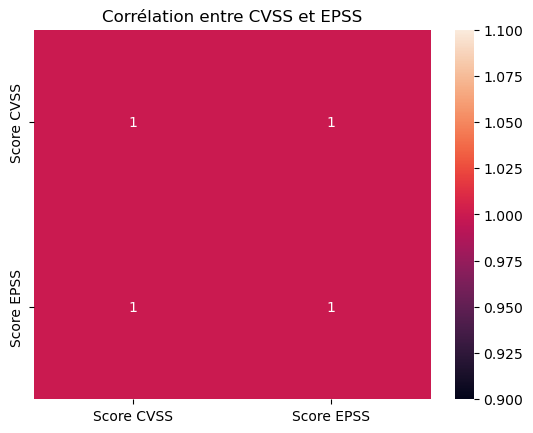

In [9]:
# -----------------------
# 6) Heatmap corrélation CVSS / EPSS
# -----------------------

plt.figure()
corr = df[["Score CVSS", "Score EPSS"]].corr()
sns.heatmap(corr, annot=True)
plt.title("Corrélation entre CVSS et EPSS")
plt.show()

**Interprétation :** Cette heatmap de corrélation quantifie la relation linéaire entre CVSS et EPSS. Un coefficient proche de 1 indique une forte corrélation positive (les scores évoluent dans le même sens), proche de -1 une corrélation négative, et proche de 0 une absence de corrélation. Cette mesure statistique complète l'analyse visuelle du nuage de points et permet de déterminer si les deux métriques sont complémentaires ou redondantes dans l'évaluation des risques.

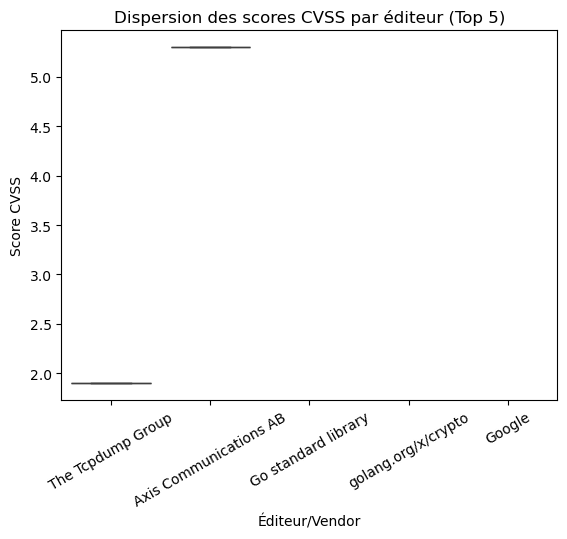

In [9]:
# -----------------------
# 7) Boxplot CVSS par éditeur (top 5)
# -----------------------

top5_vendors = df["Éditeur/Vendor"].value_counts().head(5).index
df_top5 = df[df["Éditeur/Vendor"].isin(top5_vendors)]

plt.figure()
sns.boxplot(x="Éditeur/Vendor", y="Score CVSS", data=df_top5)
plt.title("Dispersion des scores CVSS par éditeur (Top 5)")
plt.xticks(rotation=30)
plt.show()

**Interprétation :** Ce boxplot compare la distribution des scores CVSS pour les 5 éditeurs les plus affectés. Il montre la médiane, les quartiles, et les valeurs aberrantes pour chaque éditeur. Cela permet d'identifier si certains éditeurs ont tendance à avoir des vulnérabilités plus ou moins sévères en moyenne. Un boxplot avec une médiane élevée et une boîte large indique un éditeur avec des vulnérabilités globalement plus critiques et une grande variabilité dans la sévérité.

In [10]:
# -----------------------
# 8) Vulnérabilités critiques (CVSS ≥ 9)
# -----------------------

critical = df[df["Score CVSS"] >= 9]

print("\nNombre de vulnérabilités CRITIQUES (CVSS ≥ 9) :", len(critical))
print(critical[[
    "Identifiant CVE",
    "Score CVSS",
    "Score EPSS",
    "Éditeur/Vendor",
    "Produit"
]].head(10))


Nombre de vulnérabilités CRITIQUES (CVSS ≥ 9) : 0
Empty DataFrame
Columns: [Identifiant CVE, Score CVSS, Score EPSS, Éditeur/Vendor, Produit]
Index: []


**Interprétation :** Cette analyse identifie les vulnérabilités critiques (CVSS ≥ 9.0), qui représentent les risques les plus élevés nécessitant une action immédiate. Ces vulnérabilités peuvent permettre une compromission complète du système. L'absence de vulnérabilités critiques (comme dans ce cas) est une information positive, mais il est important de surveiller régulièrement cette métrique car de nouvelles vulnérabilités critiques peuvent apparaître. Cette liste doit être priorisée dans les plans de correction et de mise à jour de sécurité.

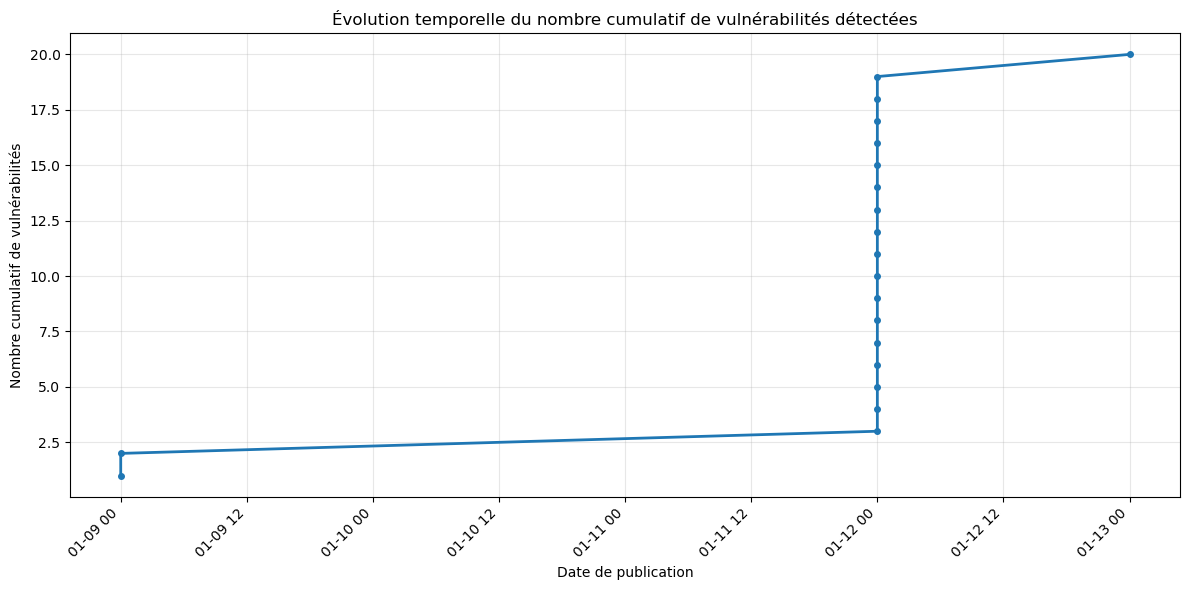


Période analysée : 2026-01-09 00:00:00+00:00 à 2026-01-13 00:00:00+00:00
Nombre total de vulnérabilités : 20


In [11]:
# -----------------------
# 9) Courbe cumulative des vulnérabilités en fonction du temps
# -----------------------

# Conversion de la date en datetime
df["Date publication"] = pd.to_datetime(df["Date publication"], errors="coerce")

# Suppression des lignes avec dates invalides
df_dates = df.dropna(subset=["Date publication"]).copy()

# Tri par date
df_dates = df_dates.sort_values("Date publication")

# Calcul du cumul (nombre cumulatif de vulnérabilités)
df_dates["Cumul"] = range(1, len(df_dates) + 1)

# Création du graphique
plt.figure(figsize=(12, 6))
plt.plot(df_dates["Date publication"], df_dates["Cumul"], marker="o", linewidth=2, markersize=4)
plt.title("Évolution temporelle du nombre cumulatif de vulnérabilités détectées")
plt.xlabel("Date de publication")
plt.ylabel("Nombre cumulatif de vulnérabilités")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(f"\nPériode analysée : {df_dates['Date publication'].min()} à {df_dates['Date publication'].max()}")
print(f"Nombre total de vulnérabilités : {len(df_dates)}")

**Interprétation :** Cette courbe cumulative montre l'évolution temporelle du nombre total de vulnérabilités détectées dans les bulletins ANSSI. La courbe croissante indique l'accumulation des vulnérabilités au fil du temps. Une pente raide suggère une période d'activité intense avec de nombreuses vulnérabilités découvertes, tandis qu'une pente douce indique une période plus calme. Cette visualisation permet d'identifier les tendances temporelles, les périodes critiques, et d'évaluer si le rythme de découverte de vulnérabilités s'accélère ou se stabilise. Elle est utile pour la planification des ressources de sécurité et la compréhension de l'évolution du paysage des menaces.